# EDA on Zomato analysis 

In [137]:

#* import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [138]:
df= pd.read_csv('zomato.csv',encoding='latin')

In [139]:
# df.to_excel('zomato.xlsx')

In [140]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [141]:
df.sample(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
715,2500079,d' Curry House,1,Aurangabad,"Hotel Green Olive, Near Baba Petrol Pump, Nira...","Hotel Green Olive, Nirala Bazar","Hotel Green Olive, Nirala Bazar, Aurangabad",75.316722,19.875337,"Continental, Chinese, Biryani, North Indian",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,73
2005,18365603,Foodie Xpress,1,Gurgaon,"Plot 52, Sector 56, Gurgaon",Sector 56,"Sector 56, Gurgaon",0.000000,0.000000,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
6661,5878,Atul Chaat Corner,1,New Delhi,"H-44, Main Market, Rajouri Garden, New Delhi",Rajouri Garden,"Rajouri Garden, New Delhi",77.120918,28.645609,Street Food,...,Indian Rupees(Rs.),No,No,No,No,1,3.8,Yellow,Good,413
6584,307075,Republic of Chicken,1,New Delhi,"100, Old Rajinder Nagar Market, Near UCO Marke...",Rajinder Nagar,"Rajinder Nagar, New Delhi",77.184919,28.640689,"Raw Meats, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,33
9303,18217279,Miann,148,Auckland,"57 Fort Street, Auckland Auckland CBD",Fort Street,"Fort Street, Auckland",174.768986,-36.846050,Desserts,...,NewZealand($),No,No,No,No,1,4.9,Dark Green,Excellent,281
772,18362677,Michael's Kitchen,1,Bhubaneshwar,"7798, Sainik School Road, Gajapati Nagar, Bhub...",Gajapati Nagar,"Gajapati Nagar, Bhubaneshwar",85.833948,20.311496,"North Indian, Asian, European",...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,118
8955,18351053,Cup and Cones,1,Noida,"Shop 24, Amrapali Princely Estate, Sector 76, ...",Sector 72,"Sector 72, Noida",77.381186,28.566377,Desserts,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.1,Orange,Average,10
5129,6377,Cakes & Bakes,1,New Delhi,"C-77, Shivalik Road, Malviya Nagar, New Delhi",Malviya Nagar,"Malviya Nagar, New Delhi",77.210737,28.537819,"Bakery, Desserts",...,Indian Rupees(Rs.),No,No,No,No,2,3.4,Orange,Average,75
9122,4000027,Biryani Mahal,1,Patna,"Near Buddha Marg, Kotwali Chauraha, Golambar, ...",Golambar,"Golambar, Patna",85.133828,25.610422,"Biryani, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,99
786,18436042,Eram Rooftop,1,Bhubaneshwar,"206, 3rd Floor, Suryansh Enclave, Shastri Naga...",Unit 4,"Unit 4, Bhubaneshwar",85.826696,20.283989,"Asian, Continental",...,Indian Rupees(Rs.),No,No,No,No,1,3.5,Yellow,Good,89


In [142]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [143]:
df[df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [144]:
df.duplicated().sum()

np.int64(0)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [146]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [147]:


#*everything is look clean in this dataset 
#! cuisines is missing 9  rows info filling with miss


In [148]:
df['Cuisines'].fillna('Missing data',inplace=True)

In [149]:

#! fill the all value of cuisines in this 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [150]:
country = pd.read_excel('Country-Code.xlsx')

In [151]:
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [152]:
final= pd.merge(df,country,on='Country Code',how='left')

In [153]:
final.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [154]:
final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [155]:
data= final.copy()

In [156]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

#univariate analysis

In [157]:
data['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

<Axes: ylabel='count'>

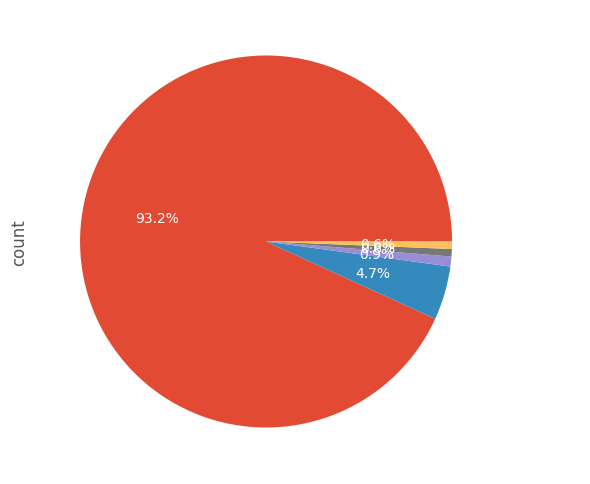

In [158]:
data['Country'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%',figsize=(6,7))

In [159]:
country_val =data['Country'].value_counts()

In [160]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [161]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
NamlÛ± Gurme                 1
Ceviz AÛôacÛ±                1
Huqqa                        1
Aôôk Kahve                 1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [162]:


#! this pie diagram show that zomato maximum transcation from india after use and many more

In [163]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [164]:
rate =data.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'rating_val'})

In [165]:
rate

,Aggregate rating,Rating color,Rating text,rating_val
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [166]:


#! rating is from 4.5 4.9  indicate excellent 
#* when the rating are 4.0 to 4.4 indicate  very good
#^ when the rating are 3.5 to 3.9 indicate good
#? when the rating are 2.4 to 3.4 indicate average
#"" when the rating are 1.8 to 2.4 indicare poor
#^ when the rating are 0.0 means not rate any more 

<Axes: xlabel='Aggregate rating', ylabel='rating_val'>

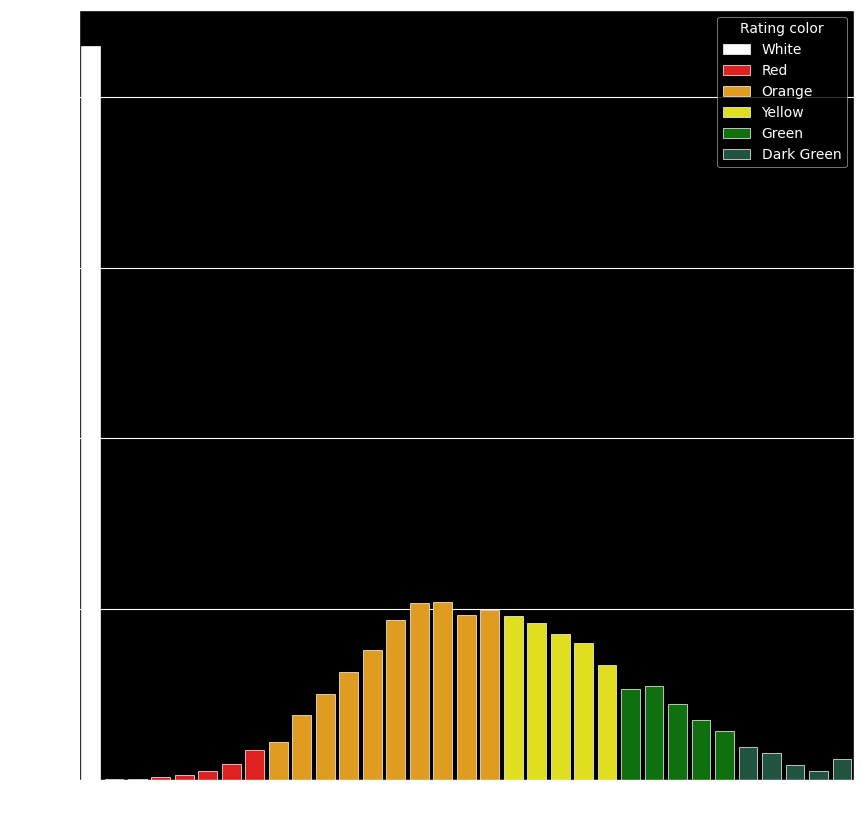

In [167]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
sns.barplot(data=rate,errorbar=None,x='Aggregate rating',y='rating_val',hue='Rating color',edgecolor='white',palette=['white','red','orange','yellow','green','#185D42'])


<Axes: xlabel='Aggregate rating', ylabel='rating_val'>

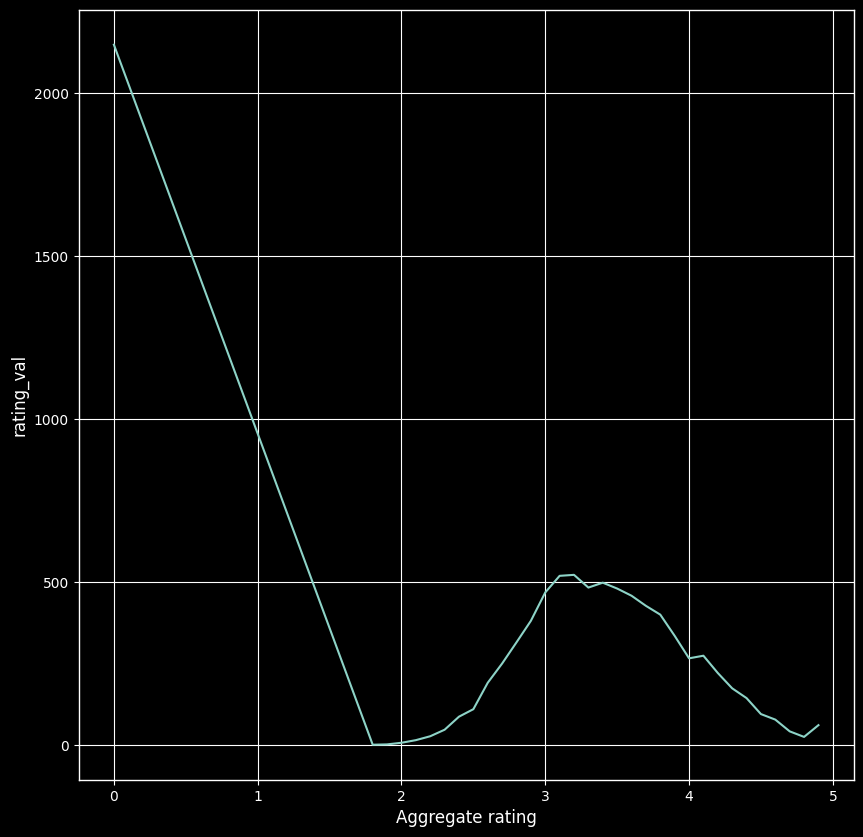

In [168]:
plt.figure(figsize=(10,10))
sns.lineplot(data=rate,errorbar=None,x='Aggregate rating',y='rating_val')


 count plot

<Axes: xlabel='Rating color', ylabel='count'>

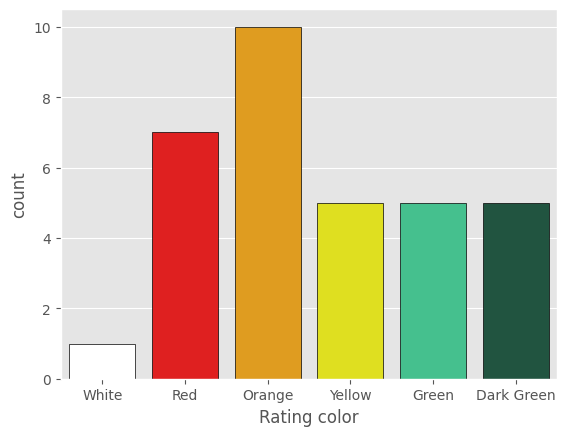

In [169]:
plt.style.use('ggplot')
sns.countplot(data=rate,x='Rating color',palette=['white','red','orange','yellow','#31D492','#185D42'],edgecolor='black')

In [170]:

#! find the country tha has zero rating

In [171]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [172]:
zero =data[data['Rating color']=='White']

In [173]:
zero

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,No,No,No,No,1,0.0,White,Not rated,2,Brazil
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,No,3,0.0,White,Not rated,1,Brazil
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,Brazil
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,"Brazilian, Mineira",...,No,No,No,No,3,0.0,White,Not rated,2,Brazil
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,2,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,1,India


In [174]:
zero.groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [175]:


#! maximum no of zero rating are from India the brazil

In [176]:
zero

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,No,No,No,No,1,0.0,White,Not rated,2,Brazil
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,No,3,0.0,White,Not rated,1,Brazil
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,Brazil
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,"Brazilian, Mineira",...,No,No,No,No,3,0.0,White,Not rated,2,Brazil
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,2,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,1,India


In [177]:


#* find out which currency is used by which country
data.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [178]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [179]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [180]:


#* which country have online delivery
data[data['Has Online delivery']=='Yes']['Country'].value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [181]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [182]:


#? find where online delivery is not 
data.groupby(['Has Online delivery','Country'])['Country Code'].size().reset_index()

,Has Online delivery,Country,Country Code
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


pie c

In [183]:

#! create a pie chart for city distrubutation

<Axes: ylabel='count'>

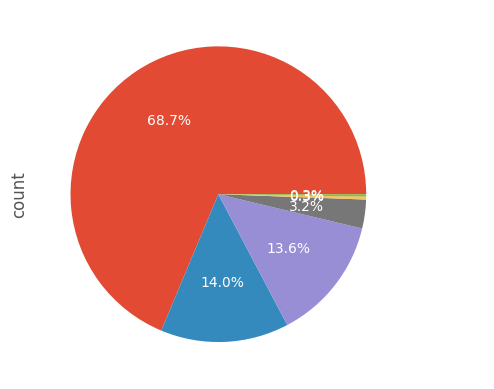

In [184]:
data['City'].value_counts().head(6).plot(kind='pie',autopct="%0.1f%%")

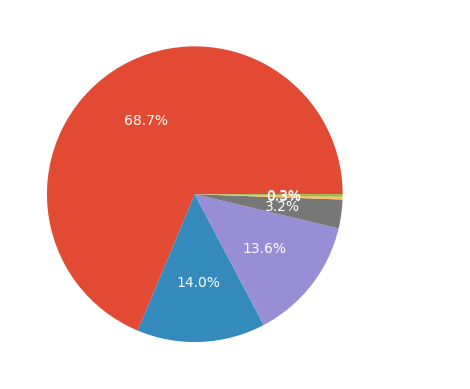

In [185]:
plt.pie(data['City'].value_counts().head(6),autopct='%0.1f%%',
          labels=data['City'].value_counts().head(6).index)
plt.show()

# Intermediate level Analytics

<Axes: xlabel='City'>

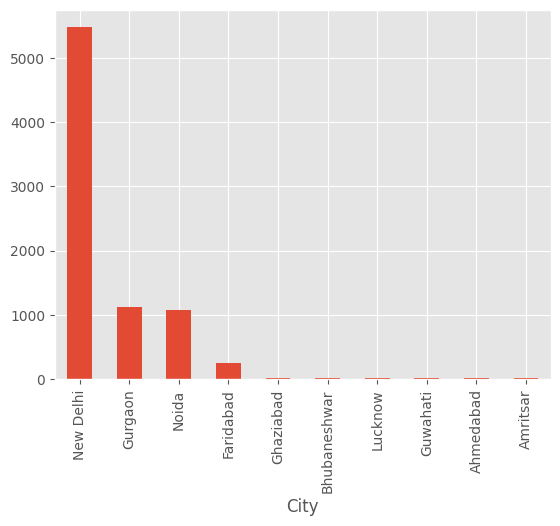

In [186]:

#! find top city with most restaurant
data.groupby('City')['Restaurant Name'].count().sort_values(ascending=0).head(10).plot(kind='bar')

<Axes: xlabel='Cuisines'>

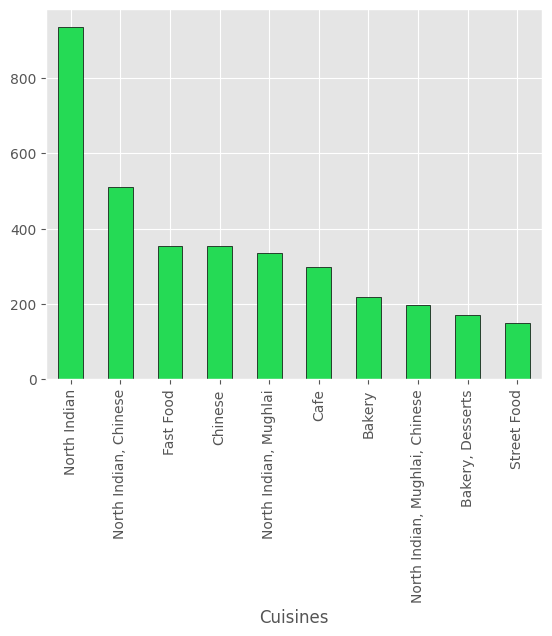

In [187]:

#*Most Common Cuisines
data['Cuisines'].value_counts(ascending=0).head(10).plot(kind='bar',color='#25DA55',edgecolor='black')

In [188]:

#^Restaurant Availability
#^ → How many restaurants provide online delivery vs table booking?

data['Has Online delivery'].value_counts()
data['Has Table booking'].value_counts()

pd.crosstab(data['Has Online delivery'],data['Has Table booking'])

Has Table booking,No,Yes
Has Online delivery,,
No,6377,723
Yes,2016,435


In [189]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

<Axes: xlabel='City'>

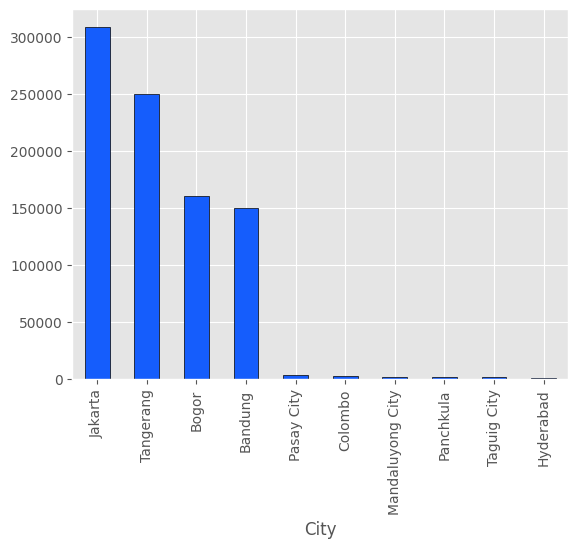

In [190]:

#!Average Cost Comparison
#^ → Compare average cost for two across top 5 cities.

data.groupby('City')['Average Cost for two'].mean().sort_values(ascending=0).head(10).plot(kind='bar',color='#155DFC',edgecolor='black')

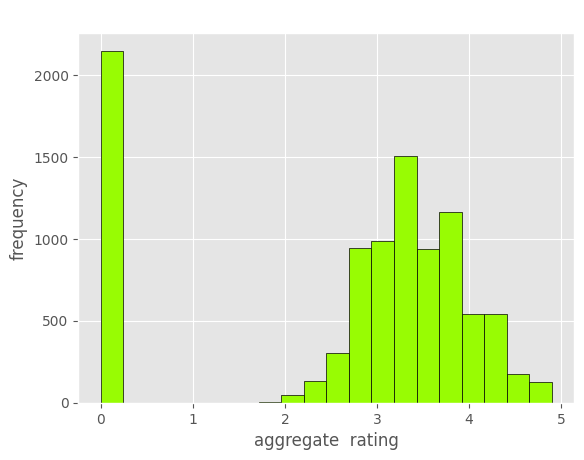

In [191]:

#! <!--  Rating Distribution  -->
#* <!-- Plot histogram of Aggregate rating and find skewness. 

data['Aggregate rating'].plot(kind='hist',color='#98FC03',edgecolor='black',bins=20)

plt.title('Distrubutation rating frequency')
plt.xlabel("aggregate  rating")
plt.ylabel('frequency')
plt.show()

# Advanced Analysis

<Axes: xlabel='Average Cost for two', ylabel='Aggregate rating'>

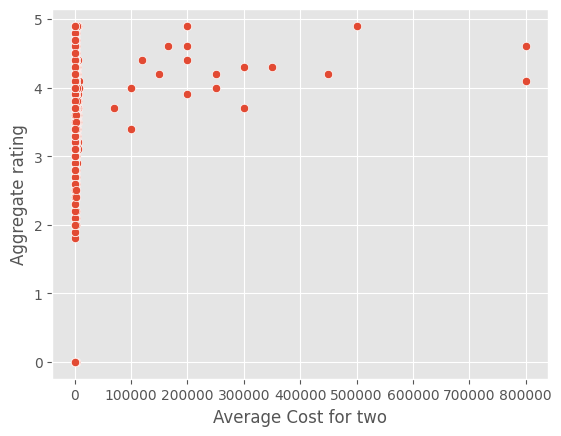

In [192]:


#!Price vs Rating Correlation
#? → Does higher cost guarantee higher rating? Use scatterplot + correlation coefficient.

sns.scatterplot(data=data,x='Average Cost for two',y='Aggregate rating')

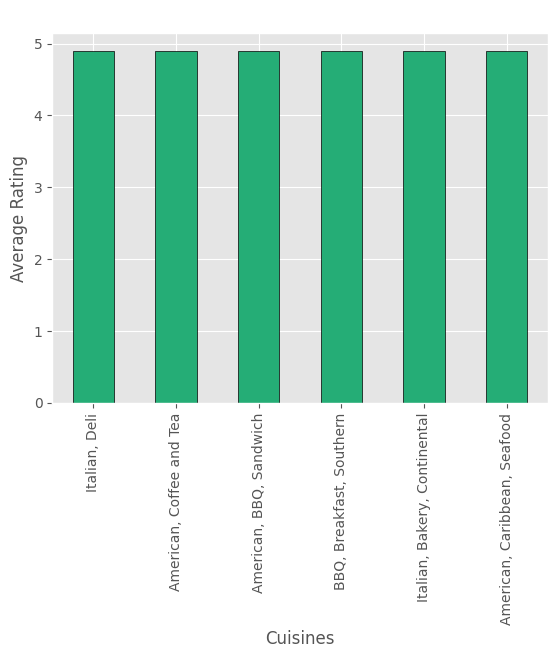

In [193]:

#!Cuisine Rating Analysis
#?→ Which cuisine has the highest average rating?


data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=0).head(6).plot(kind='bar',color='#25AD76',edgecolor='black')
import matplotlib.pyplot as plt
plt.ylabel("Average Rating")
plt.title("Top 6 Cuisines by Average Rating")
plt.show()

In [194]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

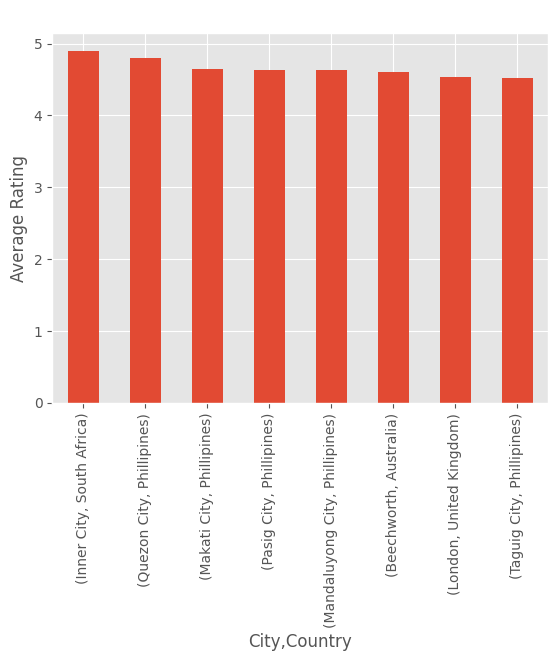

In [195]:


# City-Wise Rating Insights
# → Compare average restaurant ratings across cities/countries.

data.groupby(['City','Country'])['Aggregate rating'].mean().sort_values(ascending=0).head(8).plot(kind='bar')
plt.ylabel("Average Rating")
plt.title("Top 8 Cities by Average Restaurant Rating")
plt.show()

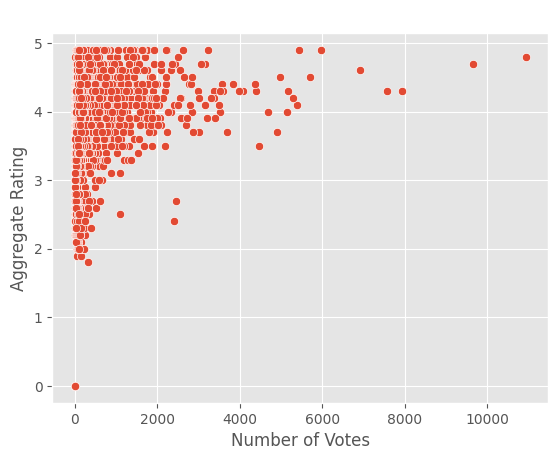

the correlation between votes and agg rating is  0.3136905841954115


In [196]:
# Votes vs Rating Relationship
# → Do restaurants with more votes tend to have better ratings?

sns.scatterplot(data=data,x='Votes',y='Aggregate rating')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# Optional: Calculate correlation
correlation = data['Votes'].corr(data['Aggregate rating'])
print(f"the correlation between votes and agg rating is ",correlation)

In [197]:

#! Delivery vs Non-Delivery Restaurants
#^ → Compare average ratings of restaurants with online delivery vs those without.
data.groupby('Has Online delivery')['Aggregate rating'].count()


Has Online delivery
No     7100
Yes    2451
Name: Aggregate rating, dtype: int64

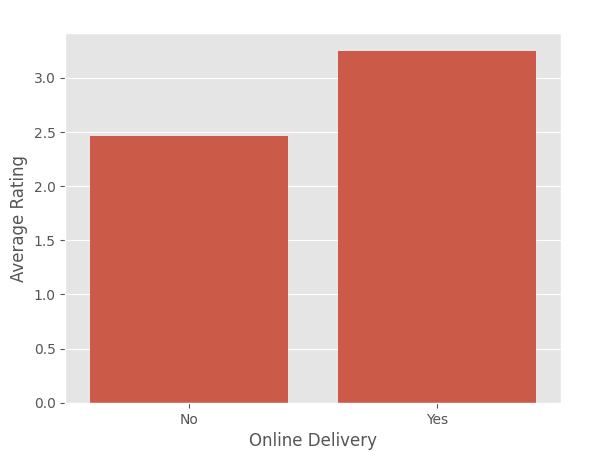

In [198]:
avg_rating =data.groupby('Has Online delivery')['Aggregate rating'].mean()

sns.barplot(data=data,x='Has Online delivery',y='Aggregate rating',estimator=np.mean,errorbar=None)
plt.title('Average Ratings: Delivery vs Non-Delivery Restaurants')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.show()

<Axes: xlabel='Currency'>

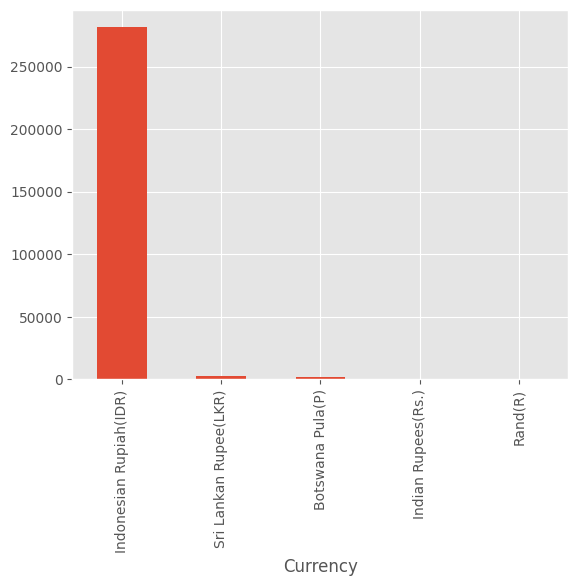

In [199]:
# Currency vs Cost Analysis
# → Group restaurants by currency and analyze cost distribution.


data.groupby('Currency')['Average Cost for two'].mean().sort_values(ascending=0).head(5).plot(kind='bar')

In [200]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [201]:
# Multivariate Analysis
# 
# Create a heatmap of correlations between:
# Average Cost for two, Price range, Aggregate rating, Votes.



corr= data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

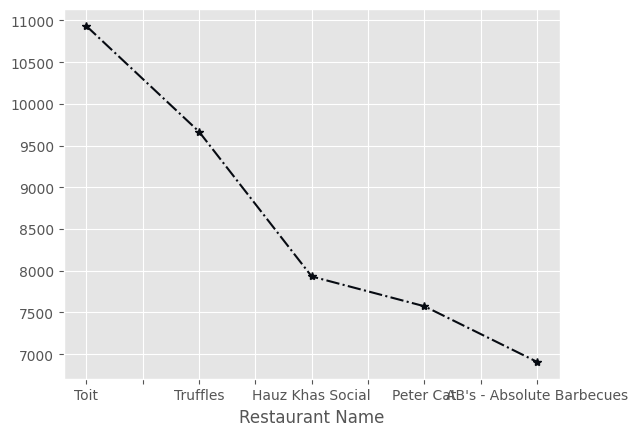

In [202]:

#! which restorant got highest vote
plt.style.use('ggplot')
line =data.groupby('Restaurant Name')['Votes'].max().sort_values(ascending=0).head(5).plot(kind='line',color='#070B12',linestyle='dashdot',marker='*')



In [203]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


<Figure size 800x700 with 0 Axes>

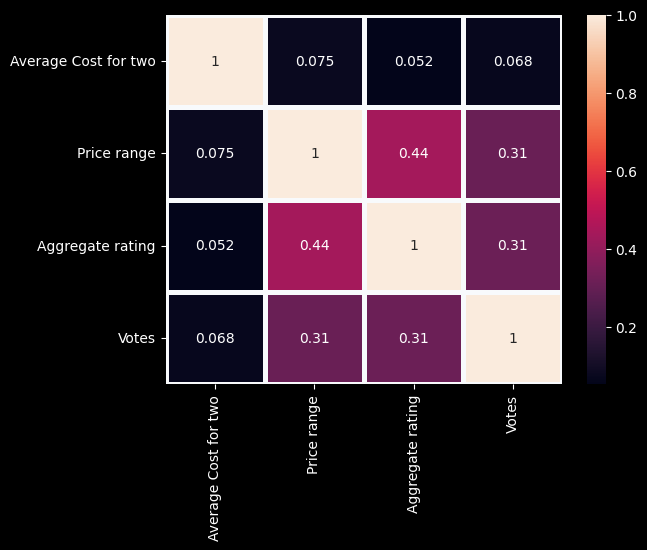

<Figure size 800x700 with 0 Axes>

In [204]:
plt.style.use('dark_background')
sns.heatmap(data=corr,annot=True,linewidths=2.5,linecolor='#F8FAFC')
plt.figure(figsize=(8,7))

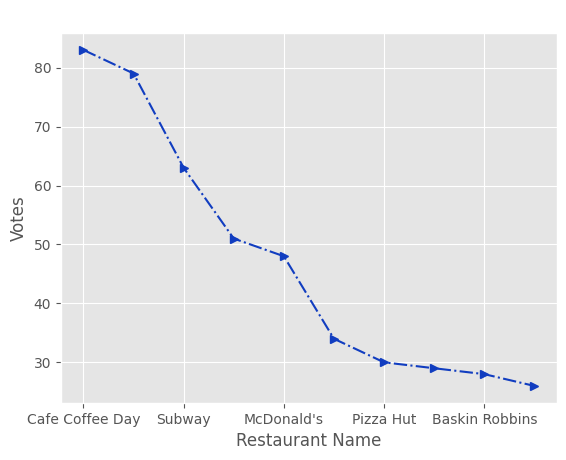

In [205]:
plt.style.use('ggplot')
data.groupby('Restaurant Name')['Aggregate rating'].count().sort_values(ascending=0).head(10).plot(kind='line',color='#113DC0',marker='>',linestyle='dashdot')
plt.ylabel("Votes")
plt.title("Top 10 Restaurants with Highest Votes")
plt.show()


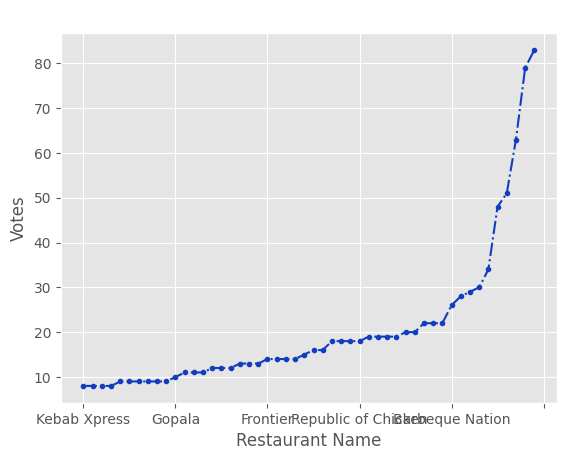

In [206]:
plt.style.use('ggplot')
data.groupby('Restaurant Name')['Aggregate rating'].count().sort_values(ascending=1).tail(50).plot(kind='line',color='#113DC0',marker='.',linestyle='dashdot')
plt.ylabel("Votes")
plt.title("Top 50 Restaurants with lowest to highest ")
plt.show()

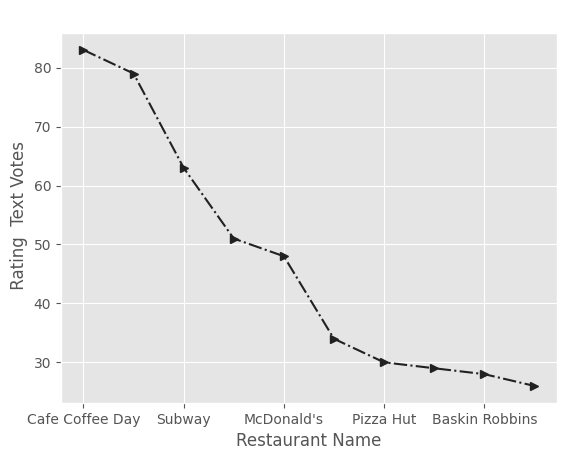

In [207]:
plt.style.use('ggplot')
#* which restarant got the rating text has excellent
data.groupby('Restaurant Name')['Rating text'].count().sort_values(ascending=0).head(10).plot(kind='line',color='#212121',marker='>',linestyle='dashdot')
plt.ylabel(" Rating  Text Votes")
plt.title("Top 10 Restaurants with Highest  text Votes")
plt.show()

In [208]:
avg= data['Average Cost for two'].sort_values(ascending=0).head(10)

<Axes: ylabel='count'>

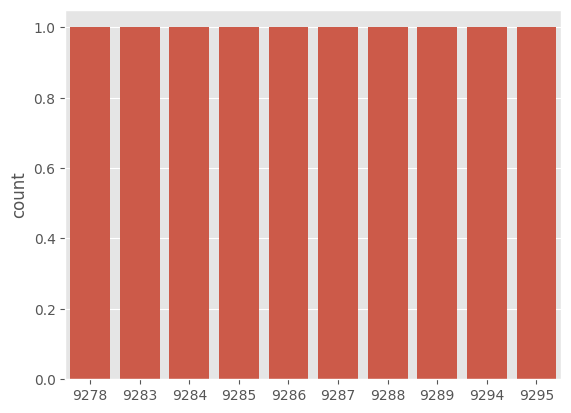

In [209]:
sns.countplot(data=avg)

In [210]:

data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


<Axes: xlabel='Has Online delivery', ylabel='Aggregate rating'>

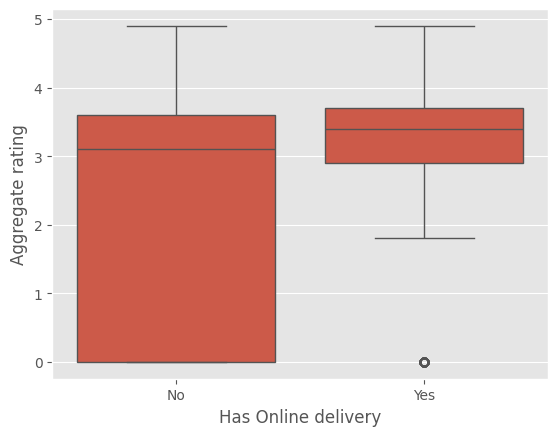

In [216]:


#! DRAW A PLOT FOR online booking received maximum rating
sns.boxplot(data=data,x='Has Online delivery',y='Aggregate rating',)

In [217]:
data['Votes'].skew()

np.float64(3.644335142042382)

In [218]:
up = data['Votes'].quantile(0.99)
data= data[data['Votes'] <= up]

In [219]:
data['Votes'].skew()

np.float64(3.104452075211738)

<Axes: xlabel='Has Online delivery', ylabel='Votes'>

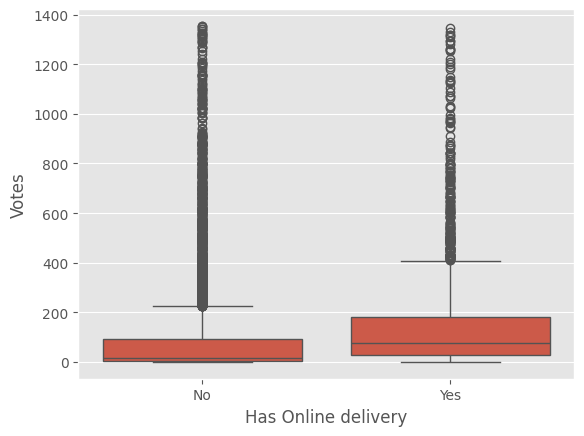

In [220]:

#! DRAW A PLOT FOR online booking received maximum rating
sns.boxplot(data=data,x='Has Online delivery',y='Votes',)

In [228]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [235]:

#! draw a heatmap for which type of restorant 
#^ received more offline order so zamato can put some good offer


d =data.pivot_table(index='City',columns='Has Online delivery',values='Aggregate rating',aggfunc='mean')



<Axes: xlabel='Has Online delivery', ylabel='City'>

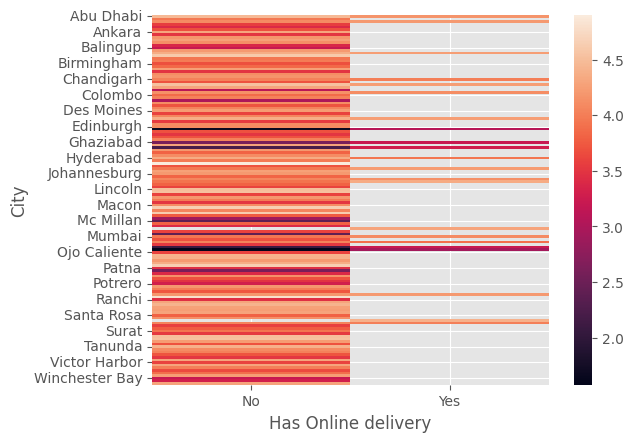

In [236]:
sns.heatmap(d)